<a href="https://colab.research.google.com/github/kinmary/deep-learning-project/blob/main/Mariia_Kindratyshyn_DLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Description: Abalone

Original Dataset: http://archive.ics.uci.edu/dataset/1/abalone

Donation Date: 11/30/1995

### **Objective**:
The dataset aims to predict the age of abalone based on physical measurements, providing an alternative to the laborious and time-consuming process of determining age through microscopic examination of shell rings.

###**Goal**:
Predict the age of abalone from physical measurements

**Age**: Rings + 1.5 = Age in years

### **Primary information:**

**Subject Area:**
Biology

**Associated Tasks:**
Classification, Regression

**Feature Types:**
Categorical, Integer, Real

**Instances:**
4177

**Features:**
8

**Missing Values:**
No missing values exist in the dataset.



### **Variables Table:**
The dataset comprises features including Sex, Length, Diameter, Height, Whole_weight, Shucked_weight, Viscera_weight, Shell_weight, and Rings (target variable).

**Sex**: Categorical variable with values M, F, and I (infant)

**Length**: Continuous variable, representing the longest shell measurement in mm

**Diameter**: Continuous variable, perpendicular to length in mm

**Height**: Continuous variable, measured with meat in shell in mm

**Whole_weight**: Continuous variable, representing the weight of the whole abalone in grams

**Shucked_weight**: Continuous variable, denoting the weight of the meat in grams

**Viscera_weight**: Continuous variable, representing gut weight after bleeding in grams

**Shell_weight**: Continuous variable, representing the weight of the shell after being dried in grams

**Rings**: Target variable, an integer representing age in years (+1.5)

### Goal and Objectives
**Goal**:
The overarching goal of this project is to develop a predictive model to estimate the age of abalones using easily obtainable physical measurements, thereby replacing the labor-intensive process of age determination involving microscopic analysis of shell rings.

**Objectives**:

Data Preparation and Exploration: Explore the dataset statistically and visually to understand feature distributions, correlations, and potential insights.

Model Development: Build and train models using appropriate approaches such as k-NN, MLP and LSTM.
Evaluate models using suitable metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or accuracy, precision, depending on the nature of the model.

Model Optimization: Employ cross-validation methods to ensure model robustness and generalization.

Performance Evaluation: Assess model performance using the baseline metrics established from the dataset description.



# Data Preparation

In [727]:
import zipfile
#import dataset
with zipfile.ZipFile("/abalone.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [728]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split

In [729]:
columns = ["Sex", "Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"] # taken from abalone.names

df = pd.read_csv("abalone.data", names = columns, index_col=False)

In [730]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [731]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [732]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [733]:
df.shape

(4177, 9)

Abalones with rings greater than 9 are considered **old**, and less than 10 are **young**. (This threshold is arbitrary)

In [734]:
print("Old abalones:", len(df[df['Rings'] > 9]))
print("Young abalones:", len(df[df['Rings'] < 10]))

Old abalones: 2081
Young abalones: 2096


In [735]:
# Add a classification target columns. If rings > 9, then classified as old - 0, else young - 1
df["Age"] = np.where(df["Rings"] > 9, 0, 1)
df.head()


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [736]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
Age               0
dtype: int64

## **Measurement error handling**

In [737]:
# height column has 0 value, which is most probably measurement error
df[df["Height"] == 0]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,1
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,1


In [738]:
#as it's only 2 rows - drop them
df = df.loc[df["Height"] != 0.0]

In [739]:
#df = df.drop('Sex', axis=1)

# Train Test split

In [740]:
# Split the data into training and testing sets (80% train, 20% test)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
X_train = train_df.drop(columns=["Age", "Rings"])
X_test = test_df.drop(columns=["Age", "Rings"])
y_train = train_df["Age"]
y_test = test_df["Age"]

In [741]:
print("train_df_x:")
print(X_train.shape)

print("train_df_y:")
print(y_train.shape)

print("test_df_x:")
print(X_test.shape)

print("test_df_y:")
print(y_test.shape)

train_df_x:
(3340, 8)
train_df_y:
(3340,)
test_df_x:
(835, 8)
test_df_y:
(835,)


# Exploratory data analysis

### **1. Distribution of target variables (Rings, Age)**

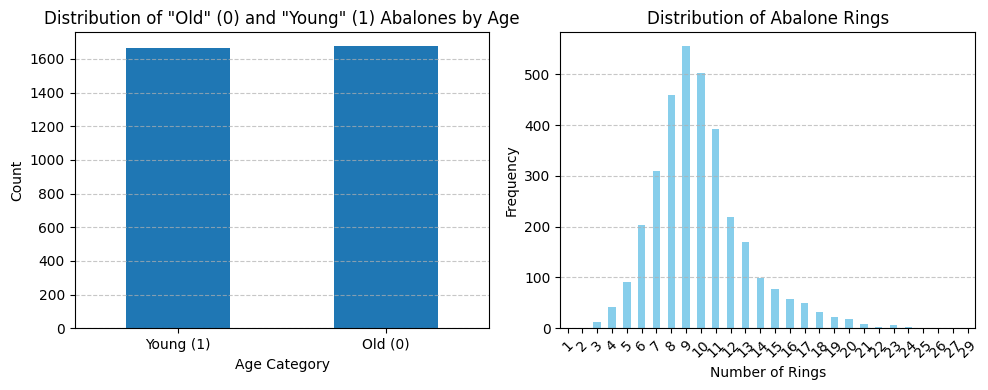

In [742]:
# Distribution of target rings - age
# Creating subplots to display two plots in one row
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plotting the distribution of 'old' (0) and 'young' (1) abalones by age
train_df['Age'].value_counts().sort_index().plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Distribution of "Old" (0) and "Young" (1) Abalones by Age')
axs[0].set_xlabel('Age Category')
axs[0].set_ylabel('Count')
axs[0].set_xticklabels(['Young (1)', 'Old (0)'], rotation=0)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

train_df['Rings'].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=axs[1])
axs[1].set_title('Distribution of Abalone Rings')
axs[1].set_xlabel('Number of Rings')
axs[1].set_ylabel('Frequency')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### **2. Distribution of categorical variable (Sex)**

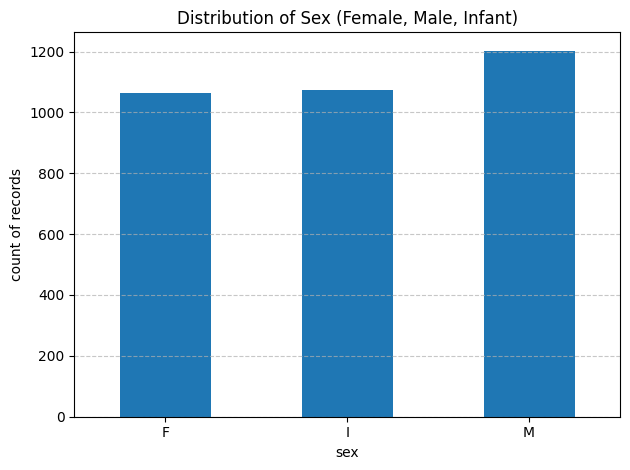

In [743]:
train_df['Sex'].value_counts().sort_index().plot(kind='bar', stacked=True)

plt.title('Distribution of Sex (Female, Male, Infant)')
plt.xlabel('sex')
plt.ylabel('count of records')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### **3. Distribution of continious variables**

In [744]:
train_df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
count,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000
mean,0.524757,0.408525,0.139710,0.829850,0.359763,0.180825,0.239064,9.931437,0.501198
std,0.119155,0.098688,0.042444,0.489471,0.221190,0.109443,0.138996,3.184611,0.500073
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000
25%,0.450000,0.350000,0.115000,0.443375,0.187000,0.093500,0.130000,8.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799750,0.338750,0.171000,0.233500,9.000000,1.000000
75%,0.615000,0.480000,0.165000,1.153000,0.500500,0.253000,0.325000,11.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000


From the plot we can group the numeric variables into three groups: (length, diameter), (height), and (whole_weight, shucked_weight, viscera_weight, shell_weight).

The first group is left skewed. The means of two classes are similar and the old abalones have less deviation from mean.
The third group is right skewed.

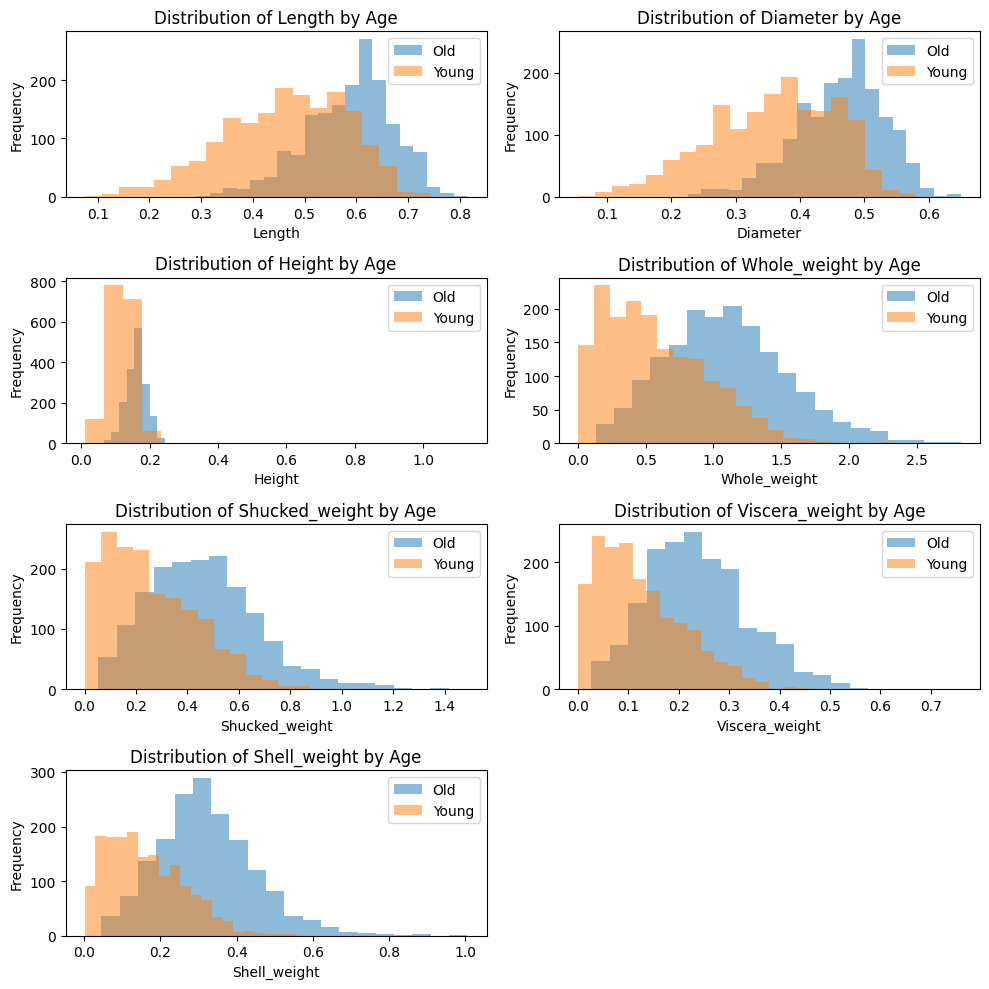

In [745]:
numeric_vars = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
age_mapping = {0: 'Old', 1: 'Young'}

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for i, var in enumerate(numeric_vars):
    ax = axes[i]
    for age_code, age_label in age_mapping.items():
        train_df[train_df['Age'] == age_code][var].plot(kind='hist', alpha=0.5, label=age_label, ax=ax, bins=20)

    ax.set_title(f'Distribution of {var} by Age')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')
    ax.legend()

# Remove any unused subplots
for j in range(len(numeric_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

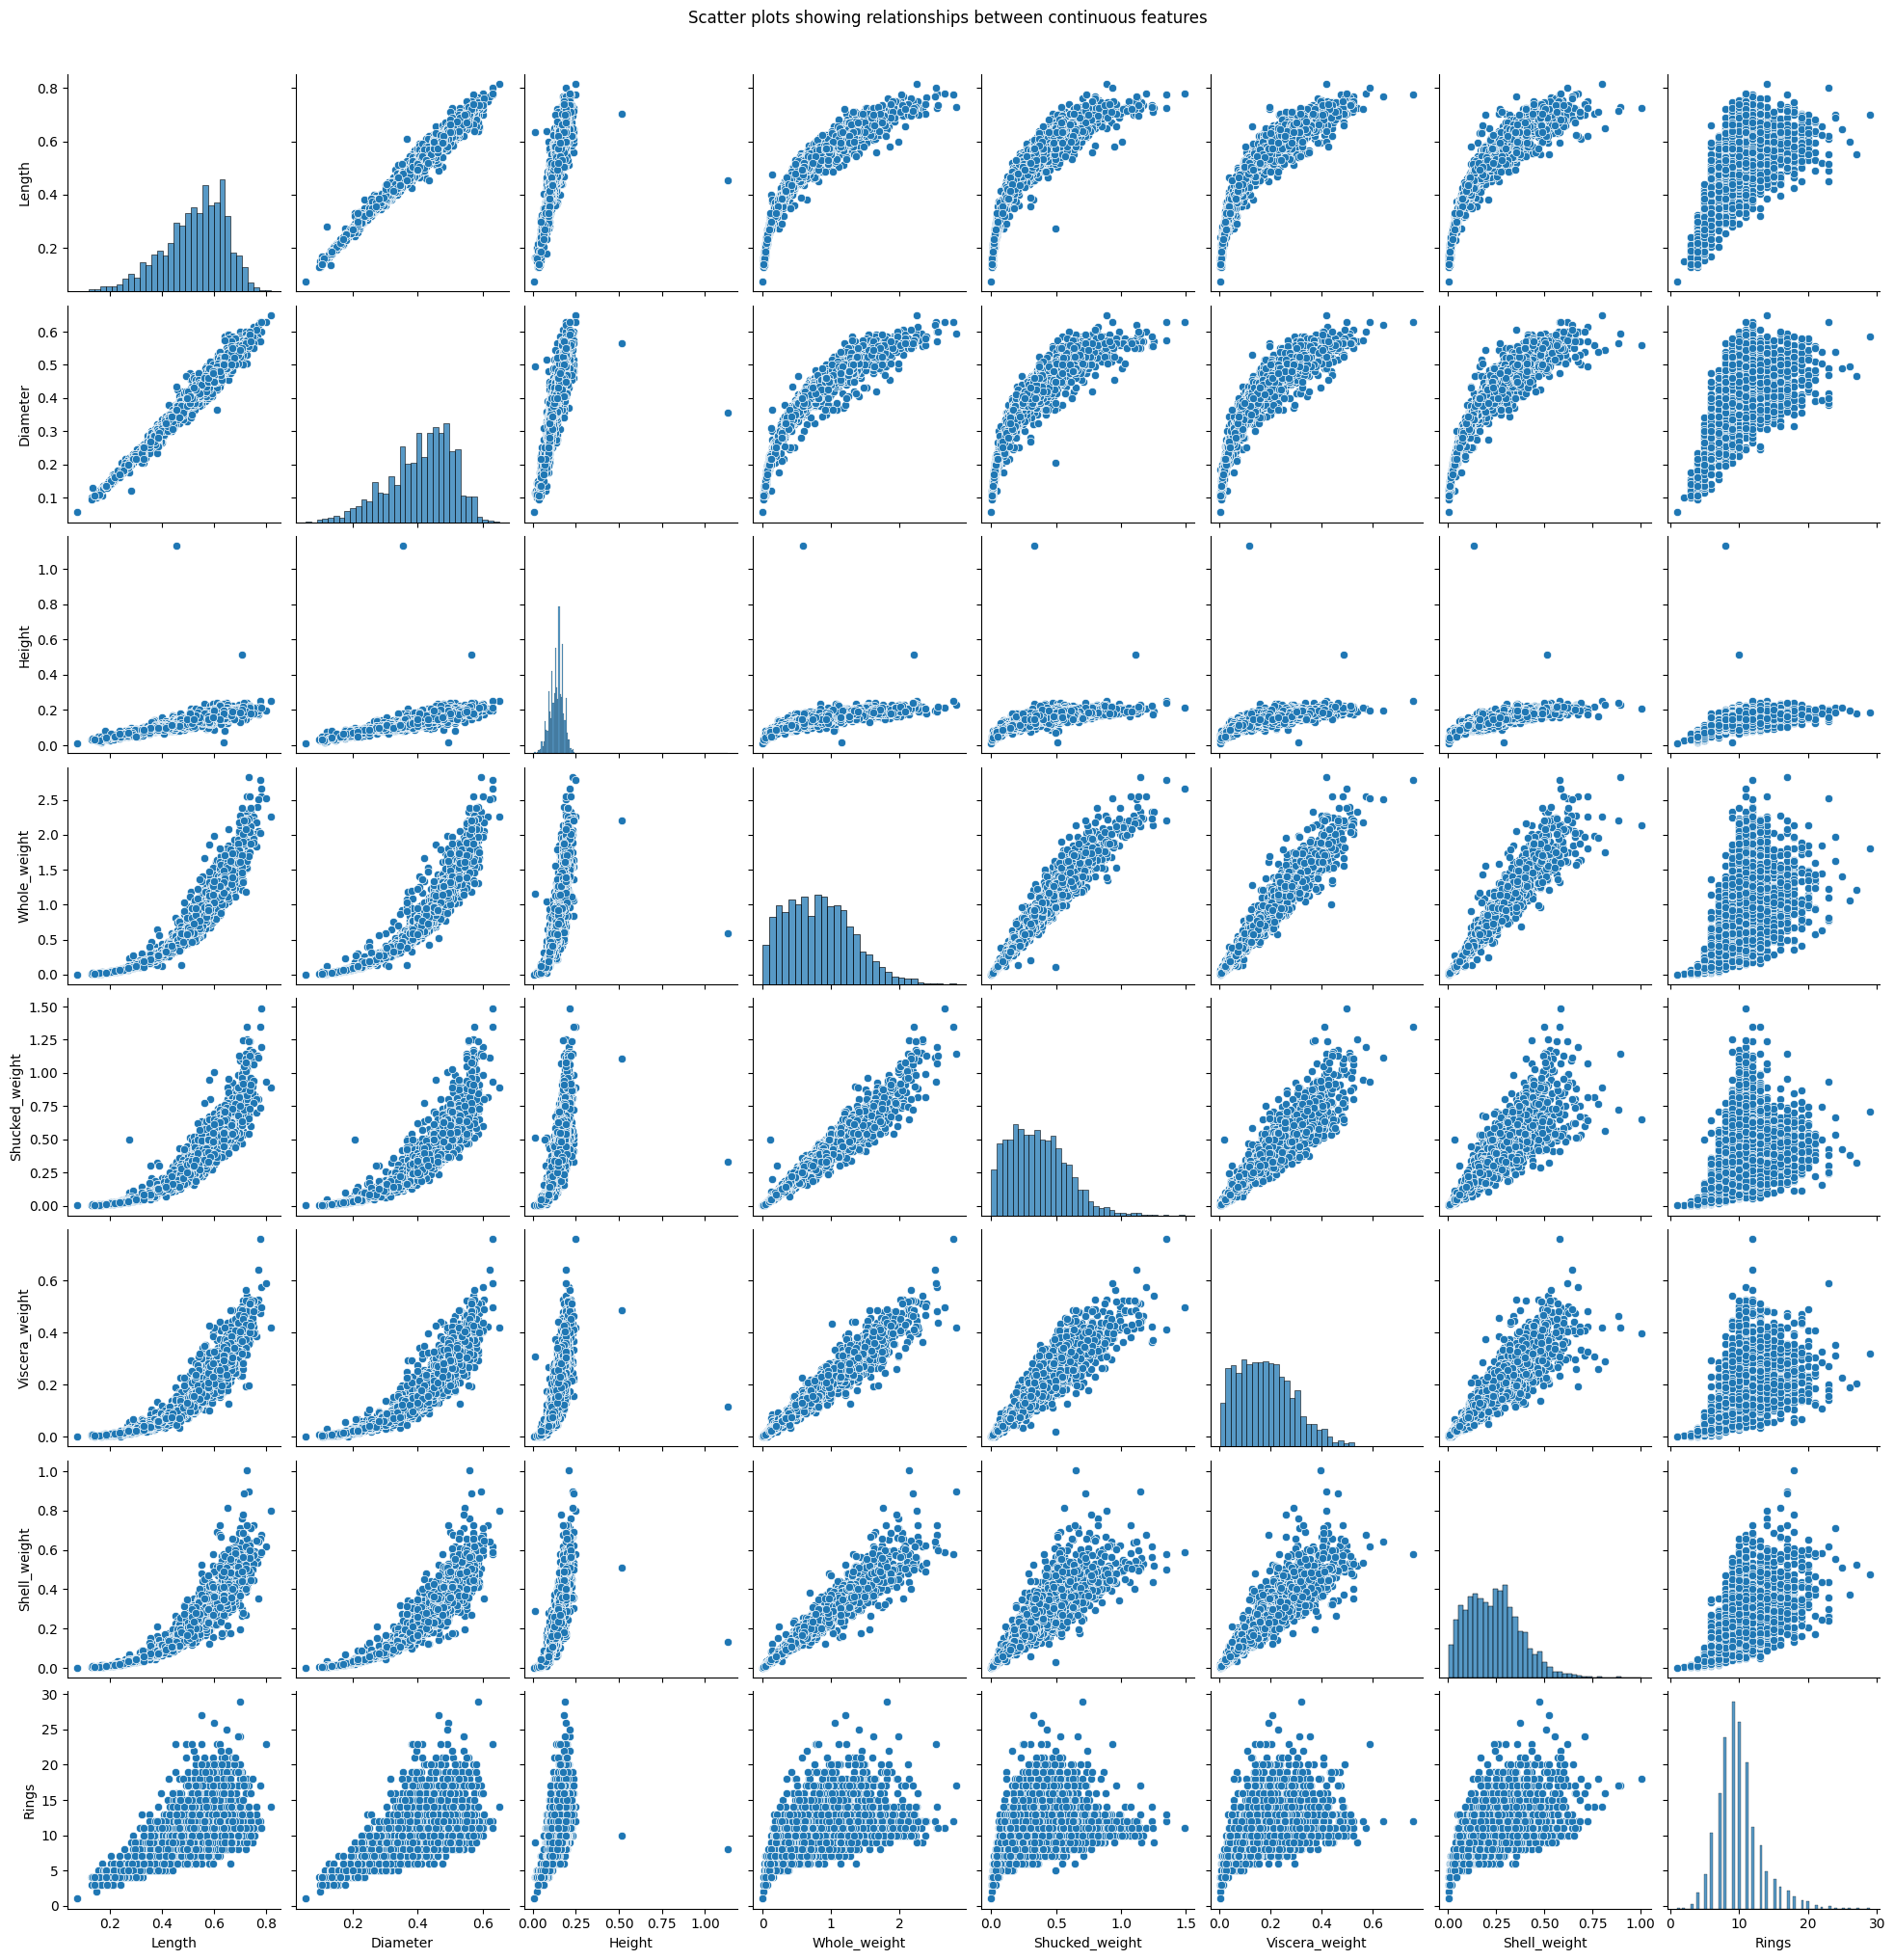

In [746]:
continuous_features = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

# Create a subset of the DataFrame with the selected continuous features
selected_features_df = train_df[continuous_features]

# Create pairplot to visualize the relationships between continuous features
pair_plot = sns.pairplot(selected_features_df)
plt.suptitle('Scatter plots showing relationships between continuous features', y=1.02)
for ax in pair_plot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)

plt.show()

### **4. Pearson Correlation Coefficient**
> A pearson correlation heat map provides more visually intuitive relationship between all variables. From the heat map we can tell that feature variables are highly correlated.

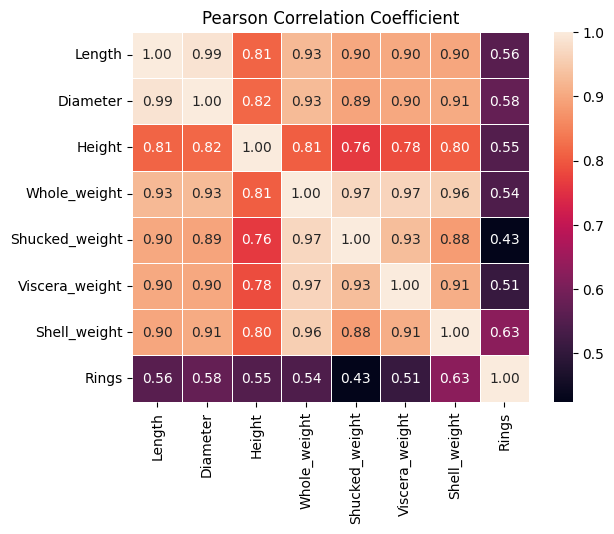

In [747]:
plt.title('Pearson Correlation Coefficient')
sns.heatmap(train_df.drop(['Sex', 'Age'], axis=1).corr(), annot=True, linewidths=0.5, fmt=".2f")

plt.show()

# Preprocessing

In [749]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [748]:
numeric_cols = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
categorical_cols = ['Sex']

# Preprocessing for numerical features: standardization
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features: one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Combine preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Machine Learning - kNN
> k-NN was chosen due to its simplicity, ease of implementation, and initial exploration of the dataset. Its ability to capture local patterns based on nearest neighbors without assuming underlying distributions made it a suitable starting point for the abalone age prediction task.



In [750]:
y_test

2331    0
2412    1
2196    0
2382    0
3572    1
       ..
2180    0
2430    0
2632    1
3463    0
2391    0
Name: Age, Length: 835, dtype: int64

In [751]:
from sklearn.model_selection import GridSearchCV

# Define a pipeline with preprocessing and K-NN classifier
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])

# Define hyperparameters grid
param_grid = {'classifier__n_neighbors': [3, 5, 7, 9, 11, 15, 20]}  # Adjust the values as needed

# Perform grid search
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_n_neighbors = grid_search.best_params_['classifier__n_neighbors']

# Train the classifier with the best n_neighbors
best_knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', KNeighborsClassifier(n_neighbors=best_n_neighbors))])
best_knn_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn_pipeline.predict(X_test)

#Best n_neighbours
print(f"Best n_neighbors: {best_n_neighbors}")

# Calculate accuracy on the test set
knn_test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of k-NN classifier: {knn_test_accuracy}")

train_y_pred = best_knn_pipeline.predict(X_train)
knn_train_accuracy = accuracy_score(y_train, train_y_pred)
print(f"Train Accuracy of k-NN classifier: {knn_train_accuracy}")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best n_neighbors: 15
Test Accuracy of k-NN classifier: 0.7892215568862275
Train Accuracy of k-NN classifier: 0.8089820359281437

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       415
           1       0.81      0.76      0.78       420

    accuracy                           0.79       835
   macro avg       0.79      0.79      0.79       835
weighted avg       0.79      0.79      0.79       835



# Neural Networks

In [ ]:
!pip install tensorflow

In [753]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import models, optimizers, losses, layers, callbacks
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM

## **Multilayer Perceptron**

> The Multilayer Perceptron (MLP) was chosen for its capability to handle non-linear relationships within the data and its versatility in learning complex patterns from the features.


In [721]:
# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)
# Transform the test data
X_test = preprocessor.transform(X_test)

# Define the MLP model
mlp_model = Sequential()
mlp_model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))  # Input layer
mlp_model.add(Dense(8, activation='relu'))  # Hidden layer
mlp_model.add(Dense(1, activation='sigmoid'))

# Compile the model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
mlp_history = mlp_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
84/84 [==============================] - 1s 8ms/step - loss: 0.6613 - accuracy: 0.5659 - val_loss: 0.6024 - val_accuracy: 0.6572
Epoch 2/100
84/84 [==============================] - 1s 9ms/step - loss: 0.5498 - accuracy: 0.7294 - val_loss: 0.5575 - val_accuracy: 0.6931
Epoch 3/100
84/84 [==============================] - 1s 6ms/step - loss: 0.5193 - accuracy: 0.7395 - val_loss: 0.5418 - val_accuracy: 0.7021
Epoch 4/100
84/84 [==============================] - 0s 4ms/step - loss: 0.5066 - accuracy: 0.7418 - val_loss: 0.5318 - val_accuracy: 0.7081
Epoch 5/100
84/84 [==============================] - 0s 4ms/step - loss: 0.4984 - accuracy: 0.7481 - val_loss: 0.5226 - val_accuracy: 0.7066
Epoch 6/100
84/84 [==============================] - 0s 4ms/step - loss: 0.4921 - accuracy: 0.7522 - val_loss: 0.5159 - val_accuracy: 0.7141
Epoch 7/100
84/84 [==============================] - 0s 4ms/step - loss: 0.4865 - accuracy: 0.7541 - val_loss: 0.5099 - val_accuracy: 0.7141
Epoch 8/100
8

In [722]:
loss, mlp_test_accuracy = mlp_model.evaluate(X_test, y_test)
train_loss, mlp_train_accuracy = mlp_model.evaluate(X_train, y_train)

y_pred = mlp_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Thresholding for binary classification

# Generate a classification report
report = classification_report(y_test, y_pred_classes)

# Print the classification report
print(f"Loss: {loss}")
print(f"MLP Test Accuracy: {mlp_test_accuracy}")
print(f"Train Loss: {train_loss}")
print(f"MLP Train Accuracy: {mlp_train_accuracy}")

print("Classification Report:")
print(report)

27/27 [==============================] - 0s 5ms/step
Loss: 0.42339134216308594
MLP Test Accuracy: 0.798802375793457
Train Loss: 0.4207628667354584
MLP Train Accuracy: 0.8068862557411194
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       415
           1       0.84      0.74      0.79       420

    accuracy                           0.80       835
   macro avg       0.80      0.80      0.80       835
weighted avg       0.80      0.80      0.80       835



## **LSTM**

> The LSTM (Long Short-Term Memory) model was chosen for its ability to effectively capture temporal dependencies and sequential patterns present in the sequential data. Abalone age prediction involve inherent time-related patterns within the dataset, making LSTM suitable due to its capability to learn from sequences and retain long-term dependencies.




In [723]:
n_samples = X_train.shape[0]  # total number of samples in your dataset
n_features = X_train.shape[1]  # total number of features
n_timesteps = 1
X_train_seq = X_train.reshape((n_samples, n_timesteps, n_features))
X_test_seq = X_test.reshape((X_test.shape[0], n_timesteps, n_features))


In [724]:
# Assuming X_train_seq is the sequential data reshaped for LSTM (3D format)
n_timesteps = X_train_seq.shape[1]  # Number of timesteps
n_features = X_train_seq.shape[2]   # Number of features

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(8, input_shape=(n_timesteps, n_features), return_sequences=True))  # LSTM layer
lstm_model.add(LSTM(8, return_sequences=False))
lstm_model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
lstm_history = lstm_model.fit(X_train_seq, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
84/84 [==============================] - 21s 33ms/step - loss: 0.6691 - accuracy: 0.7384 - val_loss: 0.6466 - val_accuracy: 0.7006
Epoch 2/100
84/84 [==============================] - 1s 14ms/step - loss: 0.6006 - accuracy: 0.7466 - val_loss: 0.5765 - val_accuracy: 0.7036
Epoch 3/100
84/84 [==============================] - 1s 11ms/step - loss: 0.5312 - accuracy: 0.7500 - val_loss: 0.5408 - val_accuracy: 0.7231
Epoch 4/100
84/84 [==============================] - 1s 12ms/step - loss: 0.5039 - accuracy: 0.7552 - val_loss: 0.5247 - val_accuracy: 0.7231
Epoch 5/100
84/84 [==============================] - 1s 10ms/step - loss: 0.4890 - accuracy: 0.7605 - val_loss: 0.5068 - val_accuracy: 0.7365
Epoch 6/100
84/84 [==============================] - 1s 14ms/step - loss: 0.4750 - accuracy: 0.7695 - val_loss: 0.4905 - val_accuracy: 0.7395
Epoch 7/100
84/84 [==============================] - 1s 13ms/step - loss: 0.4634 - accuracy: 0.7747 - val_loss: 0.4796 - val_accuracy: 0.7530
Epoch

In [725]:
loss, lstm_test_accuracy = lstm_model.evaluate(X_test_seq, y_test)
train_loss, lstm_train_accuracy = lstm_model.evaluate(X_train_seq, y_train)

y_pred = lstm_model.predict(X_test_seq)
y_pred_classes = (y_pred > 0.5).astype(int)  # Thresholding for binary classification

# Generate a classification report
report = classification_report(y_test, y_pred_classes)

# Print the report

print(f"Loss: {loss}")
print(f"LSTM Test Accuracy: {lstm_test_accuracy}")
print(f"Train Loss: {train_loss}")
print(f"LSTM Train Accuracy: {lstm_train_accuracy}")

print("Classification Report:")
print(report)

27/27 [==============================] - 3s 5ms/step
Loss: 0.42355263233184814
LSTM Test Accuracy: 0.8035928010940552
Train Loss: 0.4112931191921234
LSTM Train Accuracy: 0.8044910430908203
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       415
           1       0.82      0.79      0.80       420

    accuracy                           0.80       835
   macro avg       0.80      0.80      0.80       835
weighted avg       0.80      0.80      0.80       835



In [726]:
print("       Test Accuracy  Train Accuracy")
print(f"k-NN     {knn_test_accuracy:.6f}        {knn_train_accuracy:.6f}")
print(f"MLP      {mlp_test_accuracy:.6f}        {mlp_train_accuracy:.6f}")
print(f"LSTM     {lstm_test_accuracy:.6f}        {lstm_train_accuracy:.6f}")

       Test Accuracy  Train Accuracy
k-NN     0.789222        0.808982
MLP      0.798802        0.806886
LSTM     0.803593        0.804491


# Conclusions
## **Analysis**
**k-NN Classifier:**

Best n_neighbors: 15

Precision, Recall, F1-score: Both classes (0 and 1) show balanced performance, achieving around 78% for precision, recall, and F1-score.

Overall: k-NN achieves reasonable accuracy on both the training and test sets, with similar performance across both classes.

**MLP Classifier:**

Precision, Recall, F1-score: Slightly higher than k-NN, showing approximately 80% for precision, recall, and F1-score.

Overall: The MLP classifier displays improved accuracy compared to k-NN, achieving better balance in precision, recall, and F1-scores for both classes.

**LSTM Classifier:**

Precision, Recall, F1-score: Similar performance to the MLP, also reaching around 80% for precision, recall, and F1-score for both classes.

Overall: The LSTM model demonstrates performance comparable to the MLP, achieving a slightly lower level of accuracy and balanced metrics for both classes.

## **Comparison & Summary**
All three models (k-NN, MLP, LSTM) display relatively similar performance in predicting the age of abalone.

The MLP and LSTM models slightly outperform the k-NN classifier, achieving slightly higher accuracy and balanced metrics across classes.

The accuracy achieved by all models ranges around 80%, indicating a reasonable predictive capability for the age prediction task.

Based on the results, the **MLP** and **LSTM** models exhibit slightly superior performance compared to the **k-NN** classifier, with a marginal increase in accuracy and balanced metrics for predicting the age of abalone. Both the MLP and LSTM models demonstrate a commendable ability to predict abalone age (old, young) based on the provided features.